In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train.csv')
test = pd.read_csv(filepath_home+'test_x.csv')

In [3]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [4]:
data.dropna().urban.value_counts()

2    23085
3    22206
1    11208
0      416
Name: urban, dtype: int64

In [5]:
data.dropna().corr(method='spearman')['urban'].sort_values(ascending=False) # 그나마 engnat 상관

urban         1.000000
engnat        0.153820
QtA           0.061480
QeE           0.042518
QpA           0.042154
                ...   
wr_05        -0.057294
married      -0.066656
wr_11        -0.067430
familysize   -0.068527
wr_01        -0.082552
Name: urban, Length: 73, dtype: float64

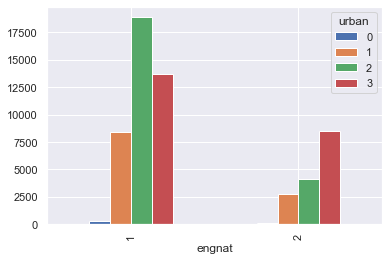

In [6]:
engnat_notnull = data[data.engnat!=0]
engnat_notnull.groupby(['engnat'])['urban'].value_counts().unstack().plot(kind='bar')

__그림으로 보니 확실히 모국어가 영어(1)인 사람들은 urban 2(비교적 도심)가 가장 많은 반면__  
__모국어가 영어가 아닌(2) 사람들은 urban 3(도심, 대도시)의 비율히 확연히 높다.__  

__corr() 계수로는 명목형 데이터들과 비교가 불가하므로 다른 명목형 변수들과 연관지어 그룹핑 해보면 ,__  

- 인종의 경우 `Native American` 의 경우 오히려 __비도심__ 의 비율이 __비교적 도심__ 의 비율보다도 높으며 `Indigenous Australian` 의 경우 __비도심__ 의 비율이 __완전히 도심__ 보다 큰 것을 알 수 있다.

In [7]:
data.groupby(['race'])['urban'].value_counts(normalize=True).unstack()

urban,0,1,2,3
race,,,,
Arab,0.002304,0.087558,0.324885,0.585253
Asian,0.007060,0.115674,0.314780,0.562485
Black,0.009612,0.093161,0.353789,0.543438
Indigenous Australian,NaN,0.359375,0.453125,0.187500
Native American,0.007519,0.321805,0.296241,0.374436
Other,0.007245,0.121865,0.368939,0.501951
White,0.007277,0.230864,0.436603,0.325257


- 다른 명목형 데이터 `age_group` , `religion` , `gender` 와는 특별히 눈에 띄는 점은 없었다.

__∴ engnat , race 두 데이터로 그룹핑 하여 그룹별 urban 의 빈번값을 활용한다__ 

In [8]:
clean_sample = data[(data.engnat!=0)&(data.urban!=0)] # 그룹핑 하기 전 , 무응답 항목이 있는 데이터는 제거

fill_table = clean_sample.groupby(['engnat','race'])['urban'].apply(lambda x : x.value_counts().index[0]) 
# 각 그룹의 최빈값 정보를 가지고 있는 참조 테이블

fill_table

engnat  race                 
1       Arab                     2
        Asian                    3
        Black                    3
        Indigenous Australian    2
        Native American          3
        Other                    3
        White                    2
2       Arab                     3
        Asian                    3
        Black                    3
        Indigenous Australian    1
        Native American          3
        Other                    3
        White                    3
Name: urban, dtype: int64

__urban == 0 인 행에 대하여 다른 정보(engnat , race) 로 부터 참조 테이블에서 최빈값 참조하여 fill__

In [9]:
def fill_urban_NA(row):
    try :
        fill_val = fill_table[(row.engnat,row.race)]
    except KeyError : # engnat 도 0 인 행이라면 난수 생성
        fill_val = np.random.choice(range(1,4))
        
    row['urban'] = fill_val
    return row

data[data.urban==0] = data[data.urban==0].apply(fill_urban_NA,axis=1) 

In [10]:
data.urban.value_counts()

2    23309
3    22396
1    11210
Name: urban, dtype: int64